In [3]:
import numpy as np
import anndata as ann
import pandas as pd
import scanpy as sc
import scvelo as scv
import scipy as sp
# import scipy as sci
import matplotlib.pyplot as pl
import matplotlib.pylab as pit
# import math
import csv
# import loompy
import leidenalg
import bbknn
#pretty plotting
import seaborn as sb
import scrublet as scr

from IPython.core.display import display, HTML
from matplotlib import rcParams

In [4]:
adata=sc.read('/Users/Chiara/Documents/PhD/Project_primary_resistance/scRNAseq/10x_5_treatment_data_v3/Tumor cells/data/Overlay_treatment_preprocessing_tumor_cells_bbknn_V01-sb.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 14233 × 12681
    obs: 'batch', 'batch_key', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'phase', 'S_score', 'G2M_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'log_total_counts', 'log_pct_counts_ribo', 'log_pct_counts_mito', 'samples2', 'leiden', 'samples'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo', 'n_counts', 'highly_variable', 'me

In [6]:
file_path = '/Users/Chiara/Documents/PhD/Project_primary_resistance/scRNAseq/10x_5_treatment_data_v3/Tumor cells/'

In [7]:
sc.settings.figdir = file_path + '/figures/'

In [8]:
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True, transparent=True, color_map='viridis')

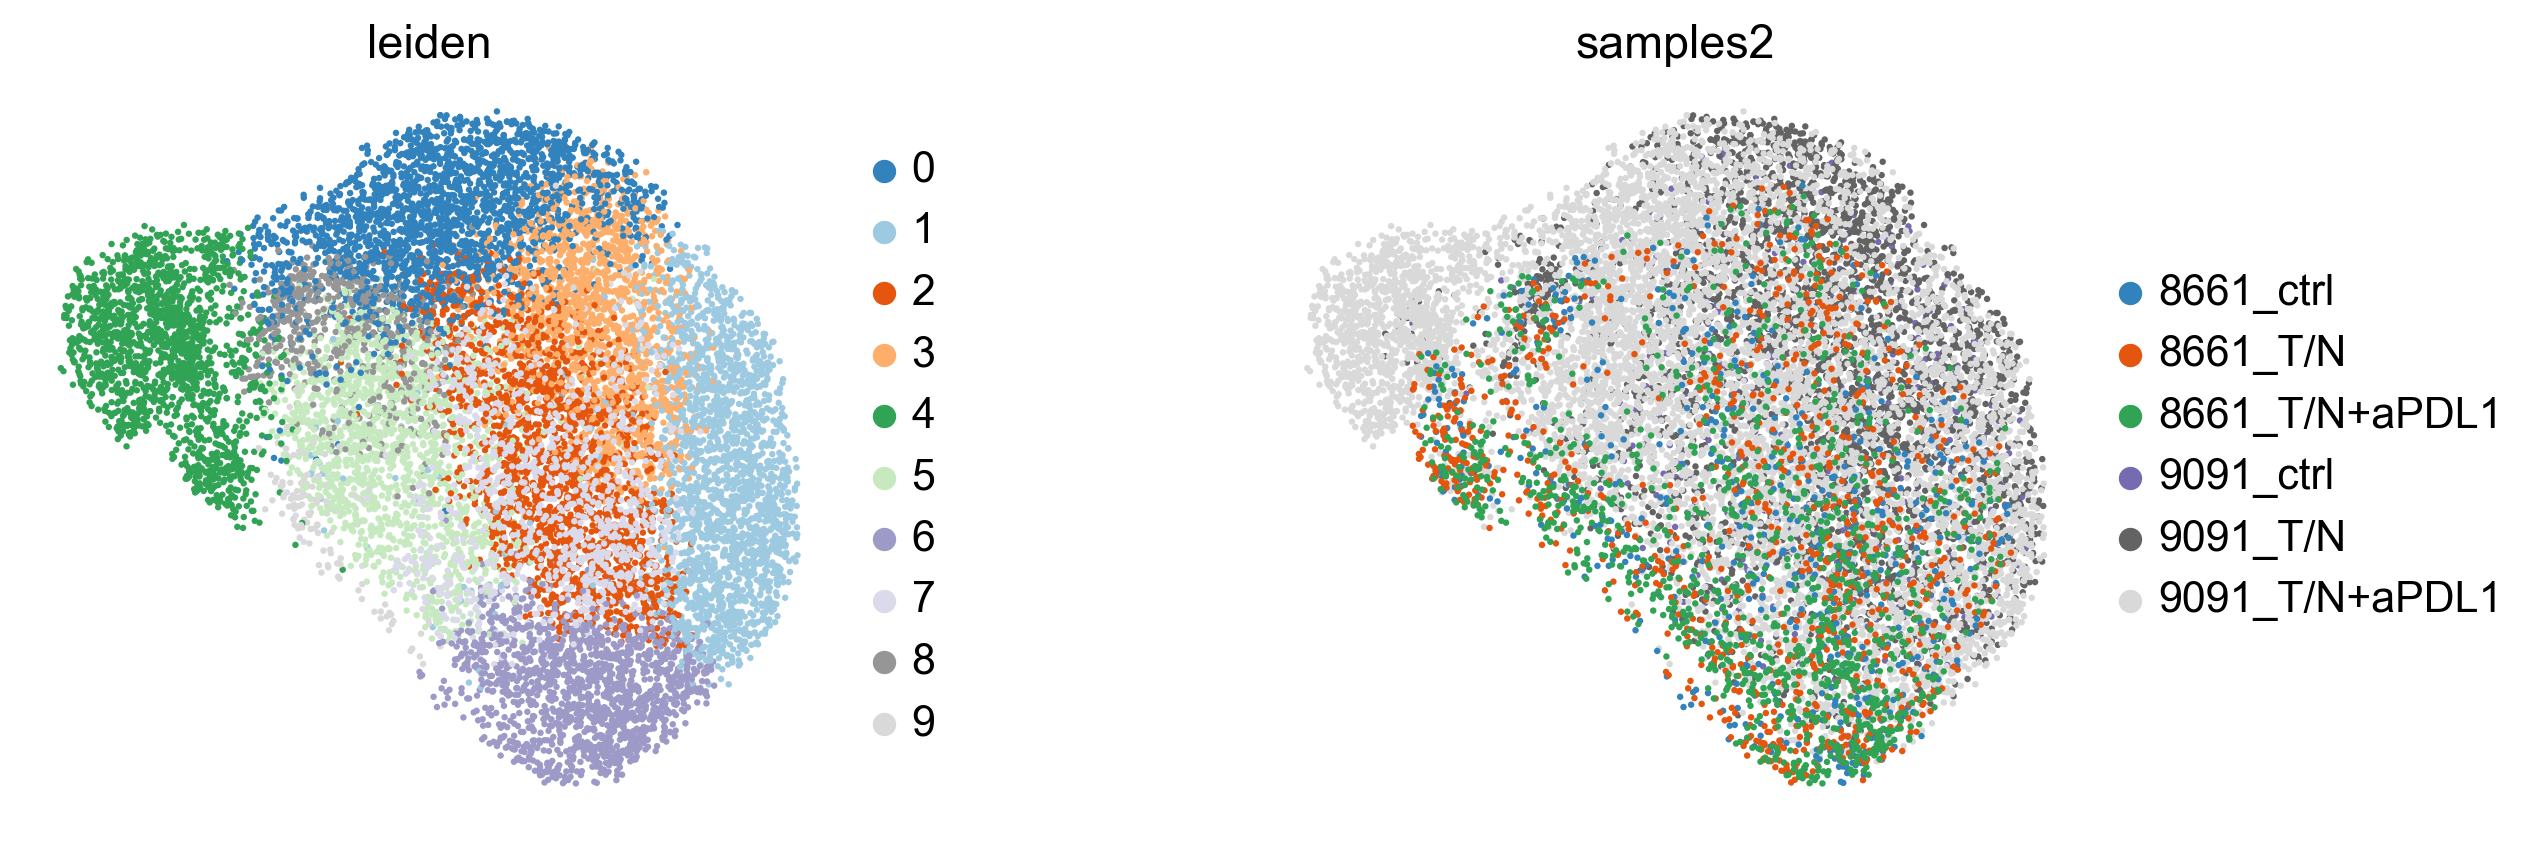

In [9]:
sc.pl.umap(adata, color=['leiden','samples2'], size=15, wspace=0.4, palette='tab20c', frameon=False,save='')

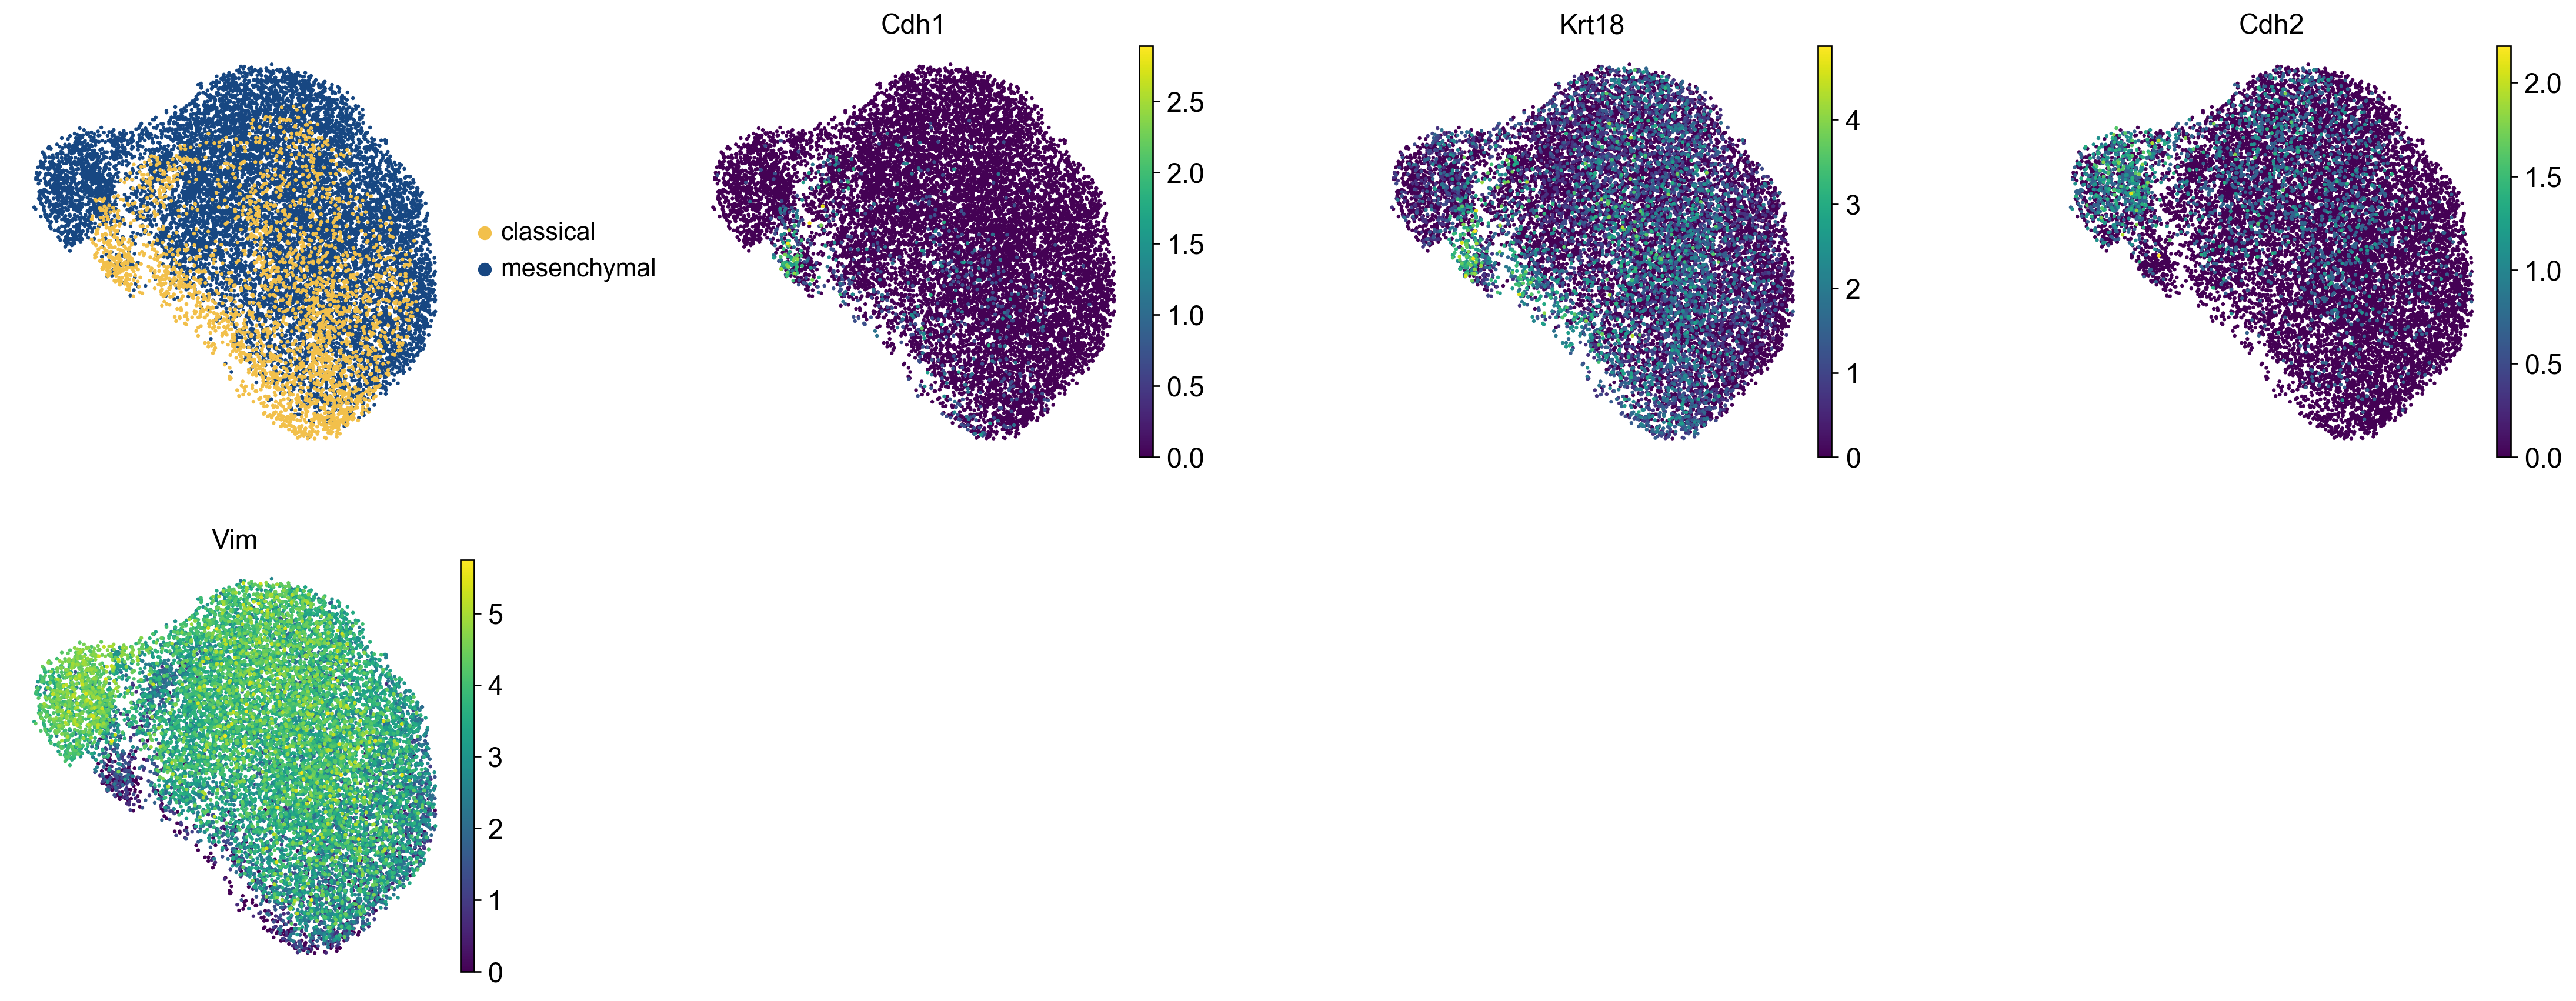

In [9]:
sc.pl.umap(adata, color=['samples','Cdh1','Krt18','Cdh2','Vim'], title='', size=15, wspace=0.4, palette=['#f2c04b','#174782'], frameon=False,save='EMT')

In [11]:
EMT=('Cdh1','Krt18','Cdh2','Vim')

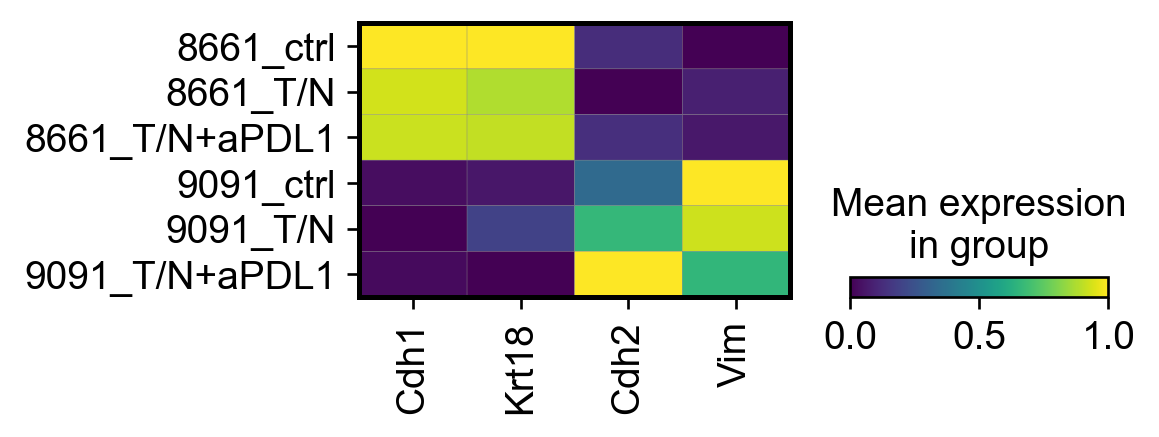

In [22]:
sc.pl.matrixplot(adata, EMT, groupby='samples2', use_raw=False, 
                 standard_scale='var', vmin=0, vmax=1 ,swap_axes=False,
                figsize=(4,1.5), save='_EMT')


## Differential expression analysis

In [8]:
adata.obs['samples2'].value_counts()

9091_T/N+aPDL1    7697
9091_T/N          3275
8661_T/N+aPDL1    1220
8661_T/N           992
8661_ctrl          617
9091_ctrl          432
Name: samples2, dtype: int64

### rank_genes_groups

#### Classical

T+N differentially expressed

In [43]:
sc.tl.rank_genes_groups(adata, 'samples2', groups=['8661_T/N'], method='t-test', reference='8661_ctrl', n_genes=4000, use_raw=False)

In [44]:
Genes = np.array([])
Genes=adata.uns['rank_genes_groups']['names']['8661_T/N']
df_Genes=pd.DataFrame(Genes)

In [45]:
Pvals_adj = np.array([])
Pvals_adj=adata.uns['rank_genes_groups']['pvals_adj']['8661_T/N']
df_Pvals_adj=pd.DataFrame(Pvals_adj)

In [46]:
LFCs = np.array([])
LFCs=adata.uns['rank_genes_groups']['logfoldchanges']['8661_T/N']
df_LFCs=pd.DataFrame(LFCs)

In [47]:
Scores = np.array([])
Scores=adata.uns['rank_genes_groups']['scores']['8661_T/N']
df_Scores=pd.DataFrame(Scores)

In [48]:
horizontal_stack = pd.concat([df_Genes, df_Pvals_adj, df_LFCs, df_Scores], axis=1, 
                             names=['Genes','Pvals_adj','LFCs','Scores'])

In [49]:
horizontal_stack.to_excel('8661_TN_vs_ctrl.xlsx', index=False)

T+N+aPDL1 differentially expressed

In [71]:
sc.tl.rank_genes_groups(adata, 'samples2', groups=['8661_T/N+aPDL1'], method='t-test', reference='8661_ctrl', n_genes=4000, use_raw=False)

In [72]:
Genes = np.array([])
Genes=adata.uns['rank_genes_groups']['names']['8661_T/N+aPDL1']
df_Genes=pd.DataFrame(Genes)

In [73]:
Pvals_adj = np.array([])
Pvals_adj=adata.uns['rank_genes_groups']['pvals_adj']['8661_T/N+aPDL1']
df_Pvals_adj=pd.DataFrame(Pvals_adj)

In [74]:
LFCs = np.array([])
LFCs=adata.uns['rank_genes_groups']['logfoldchanges']['8661_T/N+aPDL1']
df_LFCs=pd.DataFrame(LFCs)

In [75]:
Scores = np.array([])
Scores=adata.uns['rank_genes_groups']['scores']['8661_T/N+aPDL1']
df_Scores=pd.DataFrame(Scores)

In [76]:
horizontal_stack = pd.concat([df_Genes, df_Pvals_adj, df_LFCs, df_Scores], axis=1)

In [77]:
horizontal_stack.to_excel('8661_TNaPDL1_vs_ctrl.xlsx', index=False) 

#### Mesenchymal

T+N differentially expressed

In [78]:
sc.tl.rank_genes_groups(adata, 'samples2', groups=['9091_T/N'], method='t-test', reference='9091_ctrl', n_genes=4000, use_raw=False)

In [79]:
Genes = np.array([])
Genes=adata.uns['rank_genes_groups']['names']['9091_T/N']
df_Genes=pd.DataFrame(Genes)

In [80]:
Pvals_adj = np.array([])
Pvals_adj=adata.uns['rank_genes_groups']['pvals_adj']['9091_T/N']
df_Pvals_adj=pd.DataFrame(Pvals_adj)

In [81]:
LFCs = np.array([])
LFCs=adata.uns['rank_genes_groups']['logfoldchanges']['9091_T/N']
df_LFCs=pd.DataFrame(LFCs)

In [82]:
Scores = np.array([])
Scores=adata.uns['rank_genes_groups']['scores']['9091_T/N']
df_Scores=pd.DataFrame(Scores)

In [83]:
horizontal_stack = pd.concat([df_Genes, df_Pvals_adj, df_LFCs, df_Scores], axis=1)

In [84]:
horizontal_stack.to_excel('9091_TN_vs_ctrl.xlsx', index=False) 

T+N+aPDL1 differnetially expressed

In [85]:
sc.tl.rank_genes_groups(adata, 'samples2', groups=['9091_T/N+aPDL1'], method='t-test', reference='9091_ctrl', n_genes=4000, use_raw=False)

In [86]:
Genes = np.array([])
Genes=adata.uns['rank_genes_groups']['names']['9091_T/N+aPDL1']
df_Genes=pd.DataFrame(Genes)

In [87]:
Pvals_adj = np.array([])
Pvals_adj=adata.uns['rank_genes_groups']['pvals_adj']['9091_T/N+aPDL1']
df_Pvals_adj=pd.DataFrame(Pvals_adj)

In [88]:
LFCs = np.array([])
LFCs=adata.uns['rank_genes_groups']['logfoldchanges']['9091_T/N+aPDL1']
df_LFCs=pd.DataFrame(LFCs)

In [89]:
Scores = np.array([])
Scores=adata.uns['rank_genes_groups']['scores']['9091_T/N+aPDL1']
df_Scores=pd.DataFrame(Scores)

In [90]:
horizontal_stack = pd.concat([df_Genes, df_Pvals_adj, df_LFCs, df_Scores], axis=1)

In [91]:
horizontal_stack.to_excel('9091_TNaPDL1_vs_ctrl.xlsx', index=False) 

## Rappresentation of differentially expressed genes

In [20]:
adata.layers['scaled'] = sc.pp.scale(adata, copy=True).X

In [28]:
differentially_expressed_interferon=(
'H2-D1',
'Irf1',
'Gbp6',
'Cxcl9',
'Herc6',
'Psmb8',
'Zbp1',
'Psmb9',
'H2-Eb1',
'Irf2',
'Cd74',
'Bst2',
'B2m',
'Lgals3bp',
'Stat2',
'Tnfaip2',
'Cfb',
'Nlrc5',
'Ifi44',
'Irf8',
'Usp18',
'H2-DMb1',
'Tap1',
'Ddx58',
'Ptgs2',
'Rtp4',
'Rnf213',
'Socs3',
'Psme2',
'Trim25',
'Il15',
'Isg15',
'Ifit3',
'Ly6e',
'H2-Q7',
'Cmtr1',
'Znfx1',
'Samd9l',
'Gbp4',
'Oas2',
'Stat1',
'Parp14',
'Rsad2',
'Cd274',
'Btg1',
'Ccl7',
'Ddx60',
'Ifitm3',
'Trim21',
'Nfkb1',
'Ripk2',
'Tnfaip3',
'Peli1',
'Socs1',
'Nfkbia',
'Ccl2',
'Pnp',
'Arid5b',
'Stat3',
'Batf2',
'Tapbp',
'Ifi35',
'Xaf1',
'Rnf31',
'Il15ra',
'Psme1',
'Psmb10',
'Trim14')

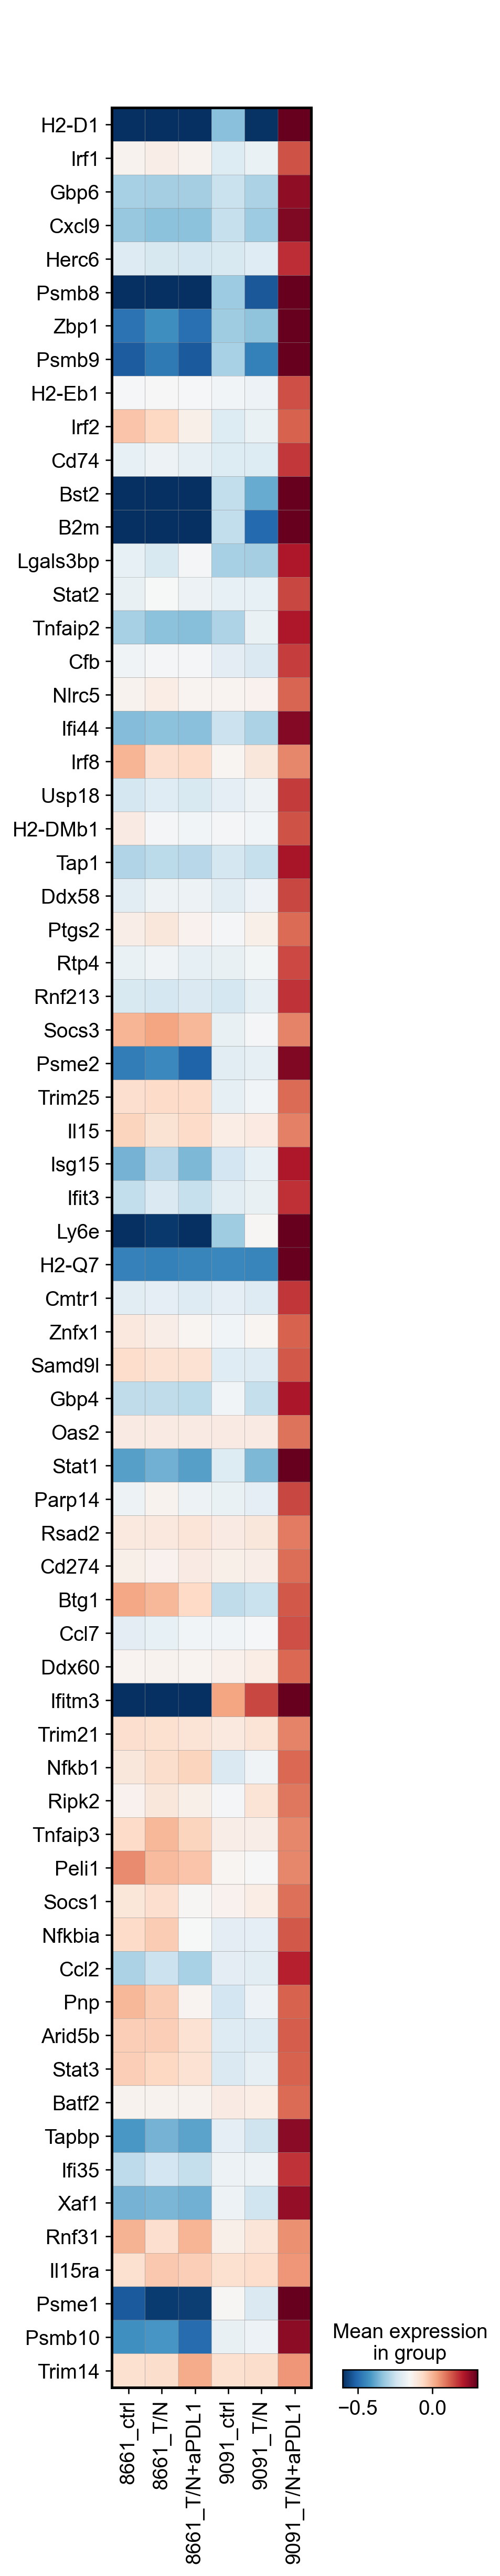

In [48]:
sc.pl.matrixplot(adata, differentially_expressed_interferon, groupby='samples2', use_raw=False, 
                 layer='scaled', vmin=-0.6, vmax=0.3, cmap='RdBu_r',swap_axes=True,save='_v2') 
#standard_scale='var'layer='scaled'